In [1]:
import os
from pathlib import Path
from typing import List
import numpy as np
from ipywidgets import widgets
import matplotlib.pyplot as plt
import nilearn.plotting as nip
import nibabel as nib
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


/group/cake/leo/.venv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
def intensity_segmentation(mri_imgs: List[np.memmap], threshold: float) -> np.array:
    """
    Does a binary segmentation on an image depending on the intensity of the pixels, if the intentsity is bigger than the threshold its a vessel,
    else its background
    Parameters
    ----------
    image
        Images to be segmented
    threshold
        The intensity threshold
    Returns
    -------
    numpy array
        A mask for the vessel

    """
    mri_imgs = [np.where(image > threshold, image, 0) for image in mri_imgs]
    #mri_imgs = [np.where(image < threshold, image, 1) for image in mri_imgs]
    return mri_imgs
    """
    segmented = []
    for image in mri_imgs:
        mask = copy.copy(image)
        mask[mask > threshold] = 1
        mask[mask < threshold] = 0
        segmented.append(mask)
    return segmented
    """

In [3]:
from torch_geometric.data import Data
import torch


def segmented_image_to_graph(image: np.array, image_mask: np.array):
    """
    Converts orinal image to labeled graph

    Parameters
    ----------
    image
        image with one channel for intensity values
    mask
        array of same size, with 1 for aneuyrism
    Returns
    -------
    torch_geometric.data.Data
        contains the graph
    """
    labels = torch.tensor(np.ndarray.flatten(image_mask[image != 0]), dtype=torch.long)
    coordinates = torch.tensor(np.where(image != 0), dtype=torch.float)
    coordinates = torch.transpose(coordinates, 0, 1)
    intensity_values = torch.unsqueeze(torch.tensor(np.ndarray.flatten(image[image != 0]), dtype=torch.float), 1)
    return Data(x=intensity_values, pos=coordinates, y=labels)


In [4]:
def min_max_normalize(mri_imgs: List[np.memmap]):
    """Function which normalized the mri images with the min max method"""
    for i in range(len(mri_imgs)):
        mri_imgs[i] -= np.min(mri_imgs[i])
        mri_imgs[i] /= np.max(mri_imgs[i])
    return mri_imgs

In [12]:
from skimage.filters import threshold_otsu, threshold_local

def adaptive_threshold(mri_imgs:List[np.memmap]):
    for i in range(len(mri_imgs)):
        binary_adaptive = threshold_adaptive(image, block_size, offset=10)
        mri_imgs[i] = mri_imgs[i]*binary_adaptive
    return mri_imgs

ImportError: cannot import name 'threshold_adaptive' from 'skimage.filters' (/group/cake/leo/.venv/lib/python3.8/site-packages/skimage/filters/__init__.py)

In [10]:




global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
binary_adaptive = threshold_adaptive(image, block_size, offset=10


#%matplotlib widget
data_path = Path('../../../../../data/training')
vieworder=(2,1,0)
for i in range(20,30):
    image_number= f"A0{i}"
    image_orig_path = image_number+'_orig.nii.gz'
    image_vessel_path=image_number+'_vessel.nii.gz'
    image_aneurysm_path =image_number+'_masks.nii.gz'



    try:
        vessel_mask = nib.load(data_path/image_vessel_path)
    except:
        continue
    orig_image = nib.load(data_path/image_orig_path)
    orig_image_data=min_max_normalize([orig_image.get_fdata()])
    data = min_max_normalize([vessel_mask.get_fdata()]) 
    aneurysm_image = nib.load(data_path/image_aneurysm_path)
    aneurysm_data= min_max_normalize([aneurysm_image.get_fdata()])
    segmented = intensity_segmentation(orig_image_data,0.1)
    graph_data = segmented_image_to_graph(segmented[0],aneurysm_data[0])
    fig = pyplot.figure()
    ax = Axes3D(fig)



    ax.scatter(graph_data.pos.T[vieworder[0]],graph_data.pos.T[vieworder[1]],graph_data.pos.T[vieworder[2]],s=0.2,alpha=0.3)
    #ax.scatter(np.argwhere(data[0]).T[0],np.argwhere(data[0]).T[1],np.argwhere(data[0]).T[2],s=0.2,alpha=0.7)
    ax.scatter(np.argwhere(aneurysm_data[0]).T[vieworder[0]],np.argwhere(aneurysm_data[0]).T[vieworder[1]],np.argwhere(aneurysm_data[0]).T[vieworder[2]],s=0.2,alpha=1)
    pyplot.savefig("our_vessel.png")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

tensor([[ 55.,  68., 217.],
        [ 55.,  68., 218.],
        [ 55.,  68., 219.],
        ...,
        [210.,  86., 215.],
        [210.,  87., 215.],
        [210.,  88., 216.]])


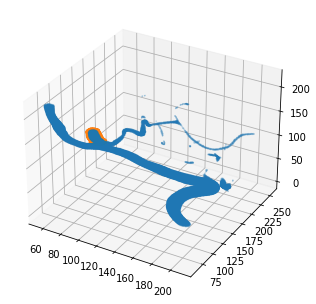

[[ 66 103 123]
 [ 66 104 123]
 [ 66 104 124]
 ...
 [202 163  53]
 [202 163  54]
 [202 163  55]]


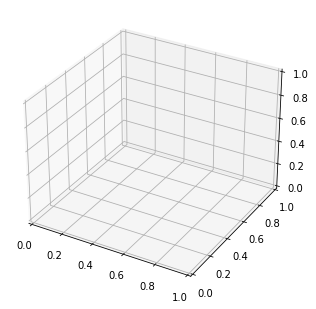

In [97]:

fig = pyplot.figure()
ax = Axes3D(fig)
print(np.argwhere(data[0]))

pyplot.savefig("given_vessel.png")
